In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)


In [2]:
data = pd.read_csv('../airfoil.csv' , header = None )
data.columns  = ['frequency' , 'angle_of_attack','chord_length','free_stream_velocity','suction_side_displacement_thickness','scaled_sound_pressure']

In [3]:
x = data[['frequency', 'angle_of_attack','chord_length','free_stream_velocity','suction_side_displacement_thickness']]
y = data['scaled_sound_pressure']

# EDA

In [57]:
data.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299


In [58]:
data.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2938.061564,6.657654,0.139996,50.829201,0.010967,124.726941
std,3180.433353,5.800597,0.094807,15.540260,0.013082,6.968144
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.100000
50%,1600.000000,5.300000,0.101600,39.600000,0.004957,125.726500
75%,4000.000000,9.900000,0.228600,71.300000,0.014072,129.936250
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 6 columns):
frequency                              1202 non-null float64
angle_of_attack                        1202 non-null float64
chord_length                           1202 non-null float64
free_stream_velocity                   1202 non-null float64
suction_side_displacement_thickness    1202 non-null float64
scaled_sound_pressure                  1202 non-null float64
dtypes: float64(6)
memory usage: 56.4 KB


In [60]:
# Understanding data distribution 

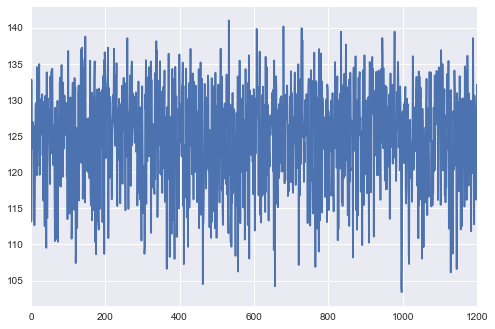

In [61]:

# check for missing values
null_value_columns = data.columns[data.isnull().any()]
    # there are no missing values in this data 

# check for duplicates rows and columns 
data.drop_duplicates(keep = 'first').shape 
    # there are no duplicate values in the rows 
    
# check for target variable distribution 
data.scaled_sound_pressure.plot()

In [62]:
# correlation of variables with target 
data.corr()['scaled_sound_pressure']

frequency                             -0.415622
angle_of_attack                       -0.138754
chord_length                          -0.240482
free_stream_velocity                   0.131766
suction_side_displacement_thickness   -0.302809
scaled_sound_pressure                  1.000000
Name: scaled_sound_pressure, dtype: float64

In [63]:
# is there a correlation among variables excluding target
correlations=data.corr()
attrs = correlations.iloc[:-1,:-1]
attrs

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness
frequency,1.000000,-0.262858,-0.006258,0.121549,-0.219393
angle_of_attack,-0.262858,1.000000,-0.505495,0.061289,0.753177
chord_length,-0.006258,-0.505495,1.000000,0.004854,-0.217233
free_stream_velocity,0.121549,0.061289,0.004854,1.000000,0.004217
suction_side_displacement_thickness,-0.219393,0.753177,-0.217233,0.004217,1.000000


In [64]:
# check for multicollinearity
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


,Attribute Pair,Correlation
0,"(angle_of_attack, suction_side_displacement_th...",0.753177
1,"(angle_of_attack, chord_length)",-0.505495


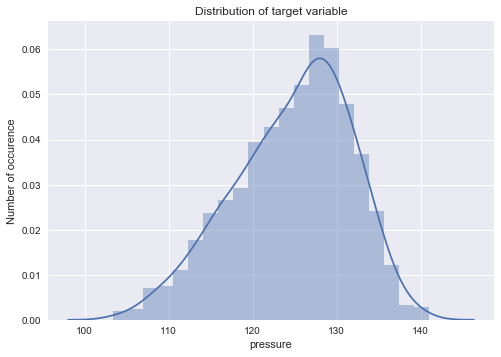

In [65]:
# check impact of x's on y 
sns.distplot(data.scaled_sound_pressure)
plt.title("Distribution of target variable")
plt.ylabel("Number of occurence")
plt.xlabel("pressure")


C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


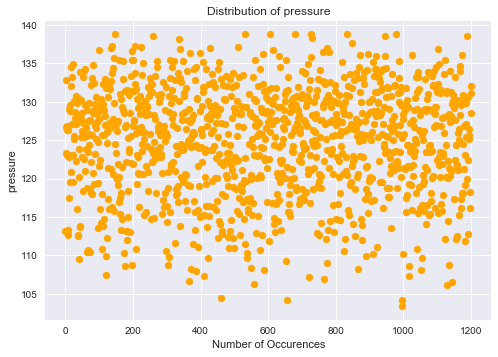

In [66]:
# check for the outliers 
upperlimit = np.percentile(data.scaled_sound_pressure.values, 99.5)
data['scaled_sound_pressure'].ix[data['scaled_sound_pressure']>upperlimit] = upperlimit

plt.scatter(range(data.shape[0]), data["scaled_sound_pressure"].values,color='orange')
plt.title("Distribution of pressure")
plt.xlabel("Number of Occurences")
plt.ylabel("pressure");


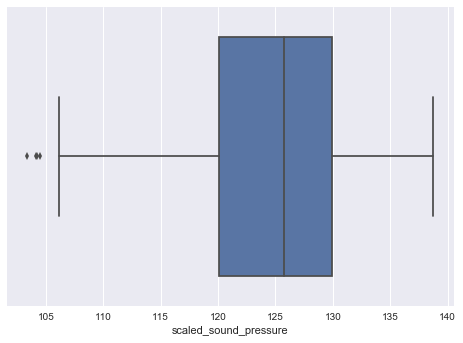

In [67]:
sns.boxplot("scaled_sound_pressure", data = data)

# Gradient Decent 

In [4]:
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
 
    m = y.size

    predictions = X.dot(theta)

    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)

    return J , np.mean(np.square(sqErrors))


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)
        

        theta_size = theta.size

        for it in range(theta_size):

            temp = X[:, it]
            temp.shape = (m, 1)
            errors_x1 = (predictions - y) * temp
            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] , Errors = compute_cost(X, y, theta)
    print('train error', Errors)
    return theta, J_history, Errors


# Preprocess and split data

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))
X =scaler.transform(x)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [6]:
# split data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X , y ,test_size=0.30, random_state=42 )

# Model Training

In [7]:
from numpy import zeros
import numpy as np 


#Initialize theta parameters

X = np.c_[np.ones(X_train.shape[0]),X_train] 
y = y_train.reshape(y_train.shape[0] , 1)
theta = zeros(shape=(X.shape[1], 1))

alpha = 0.0001 # Step size
iterations = 1000 # No. of iterations
m = y.size # No. of data points
np.random.seed(42) # Set the seed

slope , cost_history, train_error = gradient_descent(X, y, theta, alpha, iterations)

('train error', 12809.381483648189)


C:\Users\sudha\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


# Experiments

In [8]:
def run_experiments(X , y,  alpha , iterations , seed = 42):
    
    theta = np.random.rand(X.shape[1], 1)#zeros(shape=(X.shape[1], 1))
    slope , cost, error = gradient_descent(X, y, theta, alpha, iterations)
    return slope, cost

# test 1 
theta1 , costs1  = run_experiments(X , y , 0.001 ,100, seed = 100 )
# test 2 
theta2 , costs2  = run_experiments(X , y , 0.001 ,1000, seed = 200 )
# test 3 
theta3 , costs3  = run_experiments(X , y , 0.001 ,5000, seed = 300 ) 

('train error', 12739.324662592056)
('train error', 2141.6312130945066)
('train error', 23.493790089156622)


C:\Users\sudha\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


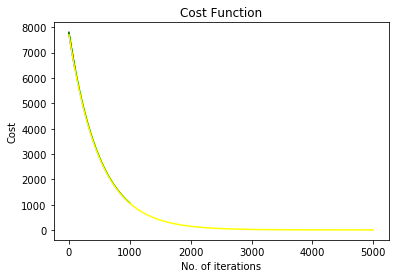

In [9]:
plt.gca().set_color_cycle(['black', 'green' , 'yellow'])

plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(np.arange(100) ,costs1 ,  label = '500')
plt.plot(np.arange(1000),costs2 ,   label = '1000')
plt.plot(np.arange(5000),costs3 ,   label = '2000')
plt.show()
 

In [10]:
# different learning parameters with fixed regression coefficients
# test 1 
theta1_b , costs1_b  = run_experiments(X , y , 0.01 ,100, seed = 42 )
# test 2 
theta2_b , costs2_b  = run_experiments(X , y , 0.001 ,2000, seed = 42 )
# test 3 
theta3_b , costs3_b  = run_experiments(X , y , 0.0001 ,5000, seed = 42 ) 

('train error', 2107.776012890569)
('train error', 310.02549027320606)
('train error', 5717.920883171149)


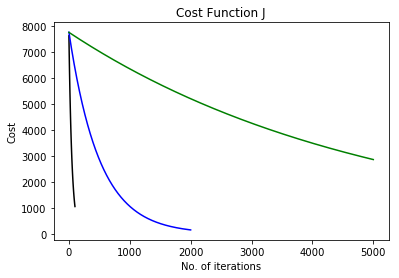

In [11]:
plt.gca().set_color_cycle(['black', 'blue' , 'green'])

plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(np.arange(100) ,costs1_b ,  label = '500')
plt.plot(np.arange(2000),costs2_b ,   label = '1000')
plt.plot(np.arange(5000),costs3_b ,   label = '2000')
plt.show()


# Predictions 

In [12]:
model = slope
 
def predictions( model , scaler , X_test):
    intercept = slope[0]
    return np.dot(scaler.inverse_transform(X_test), slope[1:]) + intercept

In [13]:
#np.dot(scaler.inverse_transform(X_test), slope[1:]) + intercept
predic = predictions(model , scaler , X_test)

# Evaluations

In [14]:
# calculate MSE error on test 
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test , predic)

481964.2718122651

# Effect of iterations on MSE 


In [15]:
def eval_metrics_a(X , y,  alpha , iterations , X_test , y_test , scaler, seed = 42 ):
    
    theta = np.random.rand(X.shape[1], 1)
    thetas , cost, train_error = gradient_descent(X, y, theta, alpha, iterations)
    
    pred = predictions(thetas , scaler , X_test)
    mse = mean_squared_error(y_test , pred)
    print('error  ' , train_error)
    return mse, train_error

In [16]:
mserror = []
for i in range(1000 , 4000 , 1000):
    
    iterations = i 
    mse, tr_err = eval_metrics_a(X , y,  alpha , i , X_test , y_test , scaler, seed = i )
    #print(error)
    mserror.append(tr_err)

('train error', 12751.191790464327)
('error  ', 12751.191790464327)
('train error', 10492.070216474161)
('error  ', 10492.070216474161)
('train error', 8524.621049474628)
('error  ', 8524.621049474628)


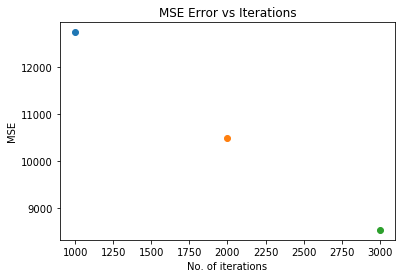

In [29]:
plt.title('MSE Error vs Iterations')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.plot(1000 ,mserror[0] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot(2000 ,mserror[1] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot(3000,mserror[2] ,  label = '500' ,  marker = 'o' ,  linestyle='--')
plt.show()

In [ ]:
# By increasing the number of iterations we noticed that MSE error decreases significantly. 
# In this case,the decrease in MSE becomes constant after 2000 interations

# Learning parameters vs Iterations 

In [44]:
def eval_metrics_b(X , y,  alpha , iterations , X_test , y_test , scaler, seed = 42 ):
    
    theta = zeros(shape=(X.shape[1], 1))
    thetas , cost ,train_error= gradient_descent(X, y, theta, alpha, iterations)
    pred = predictions(thetas , scaler , X_test)
    mse = mean_squared_error(y_test , pred)
    
    return train_error

In [48]:
errors = []
for a in [1,0.1,0.01 , 0.001 , 0.0001, ]:
    
    iterations = 1000
    alpha = a
    print('running learning rate ', alpha)
    mse = eval_metrics_b(X , y,  alpha , iterations , X_test , y_test , scaler, seed = 42 )
    errors.append(mse)

('running learning rate ', 1)
('train error', 1.5830340116947625e+114)
('running learning rate ', 0.1)
('train error', 22.73468919253453)
('running learning rate ', 0.01)
('train error', 22.736534511063546)
('running learning rate ', 0.001)
('train error', 2139.292242139411)
('running learning rate ', 0.0001)
('train error', 12809.381483648189)


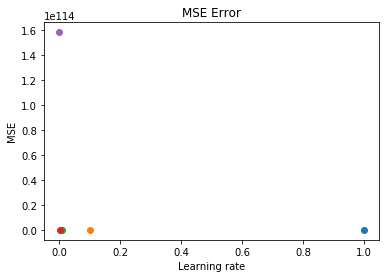

In [51]:
plt.title('MSE Error')
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.plot( 1  ,errors[4] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot( 0.1  ,errors[3] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot( 0.01  ,errors[2] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot( 0.001 ,errors[1] ,  label = '500' , marker = 'o' ,  linestyle='--')
plt.plot( 0.0001, errors[0] ,  label = '500' ,  marker = 'o' ,  linestyle='--')

plt.show()

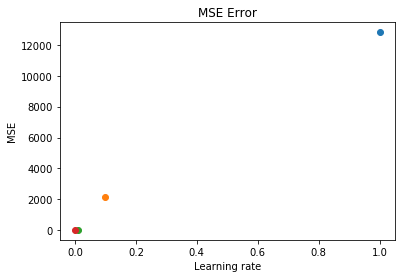

In [53]:
plt.title('MSE Error')
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.plot( 1  ,errors[4] ,  marker = 'o' ,  linestyle='--')
plt.plot( 0.1  ,errors[3] ,  marker = 'o' ,  linestyle='--')
plt.plot( 0.01  ,errors[2] ,   marker = 'o' ,  linestyle='--')
plt.plot( 0.001 ,errors[1] ,   marker = 'o' ,  linestyle='--')

plt.show()

In [ ]:
# As the learning rate increases with fixed number of itertations, we noticed that the mse error decreases upto value of 1.
# Beyond 1 MSE value becomes very high

# Regression to dataset with missing values 


In [ ]:
case 1 0-0.5% missing: in this case we can impute the missing values with suitable cetral tendencies like mean,median & mode of respective features distribution. 
    Because imputation of such a small fractioin of missing values will not impact the overall distribution. 
case 2 8-10% missing: in this case we can try different other techniques as well, including above aprroach ,
    we can try imputation method like knn imputation 
case 3 60-70% missing: At this stage while we might want to go for best imputation techniques, its worth to evaluate whether or not we should keep or drop the feature having huge missing values
    Also, domain knowledge of the data can also help impute the missing values. Because it can be subjective as well. 